
 # **Evaluating Water Potability** 
 ### By Group 21 Section 002


Clean water is an essential ingredient for human life. Nevertheless, at least 2 billion people use a contaminated drinking water source. Along with that, around 297,000 children less than five years old die globally due to the pathogens present in water (United Nations, n.d). Particularly, water quality in Nigeria is negatively impacting the health of children. The United Nations (UN) and World Health Organization (WHO) recognize that safe and readily available water and better management of water resources can greatly contribute to poverty reduction in third world countries. Currently, 30 UN entities have successfully developed partnerships with 40 international organizations to accomplish this goal (SDG 6 Global Acceleration Framework, n.d). 

Dr. Doe has been the head of WHO since 2017, and he has been monitoring the health of children suffering from waterborne diseases in Nigeria. Recently, Dr. Doe and his team of health associates have started their journey to explore the causes of unsafe drinking water in Nigeria. Through their research, they aim to explore the following question: **How can the chemical composition of water help scientists predict water potability in Nigeria?**

To answer this question, we have retrieved a dataset from kaggle.com called Water Potability Dataset. It contains water quality metrics such as pH value, hardness, dissolved solids, chloramines, sulfate, conductivity, total organic carbon, trihalomethanes, turbidity, and potability, which can be used to predict water potability for 3, 276 different water bodies.

## 1. Exploratory Data Analysis

### 1.1 Reading and loading data

We begin by installing and loading all packages and libraries required for our analysis. We also set the seed value only once at the start to ensure that our data analysis is reproducible.

In [1]:
# install required package
install.packages('corrplot')
install.packages('naniar')
install.packages("themis")

# import the libraries we need and set seed value 
library(tidyverse)
library(repr)
library(tidymodels)
library(corrplot)
library(grid)
library(gridExtra)
library(naniar)
library(themis)
library(GGally)

#set seed value only once at the beginning
set.seed(1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘viridisLite’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘fastmatch’, ‘ParamHelpers’, ‘BBmisc’, ‘checkmate’, ‘parallelMap’, ‘XML’, ‘hardhat’, ‘ipred’, ‘mlr’, ‘doParallel’, ‘FNN’, ‘recipes’, ‘generics’, ‘RANN’, ‘ROSE’, ‘unbalanced’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dp

Next, we load the dataset from our GitHub repository.

In [2]:
options(repr.matrix.max.rows = 6)
# read dataset from the web (our github repository)
# dataset source: https://www.kaggle.com/adityakadiwal/water-potability
url <- 'https://raw.githubusercontent.com/ricardoliu99/dsci100-group21/main/water_potability.csv'

# download dataset file using download.file 
download.file(url, 'water_potability.csv')

water <- read_csv('water_potability.csv') %>% mutate(Potability = as.factor(Potability))
print("Table 1. Whole dataset")
water

Parsed with column specification:
cols(
  ph = col_double(),
  Hardness = col_double(),
  Solids = col_double(),
  Chloramines = col_double(),
  Sulfate = col_double(),
  Conductivity = col_double(),
  Organic_carbon = col_double(),
  Trihalomethanes = col_double(),
  Turbidity = col_double(),
  Potability = col_double()
)



[1] "Table 1. Whole dataset"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.37978,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.18001,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.86864,66.42009,3.055934,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9.419510,175.7626,33155.58,7.350233,NA,432.0448,11.03907,69.84540,3.298875,1
5.126763,230.6038,11983.87,6.303357,NA,402.8831,11.16895,77.48821,4.708658,1
7.874671,195.1023,17404.18,7.509306,NA,327.4598,16.14037,78.69845,2.309149,1


Table 1 shows that the Water Potability dataset is tidy because it meets all three characteristics of tidy data – each row is a single observation, each column is a single variable and each value is a single cell.

### 1.2 Splitting the data into training and testing set 

We will be using 60% of our dataset for training to ensure that we train an accurate model. We chose to keep 40% of our dataset as testing data so that we can evaluate the accuracy and overall performance of our dataset by testing on a large set of observations. 

In [3]:
# split data into 60% training data and 40% test data
water_split <- initial_split(water, prop = 0.60, strata = Potability)
water_train <- training(water_split)
water_test <- testing(water_split)
print("Table 2. Training data")
water_train
print("Table 3. Testing data")
water_test

[1] "Table 2. Training data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.37978,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.18001,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.86864,66.42009,3.055934,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.808856,193.5532,17329.80,8.061362,NA,392.4496,19.90323,NA,2.798243,1
5.126763,230.6038,11983.87,6.303357,NA,402.8831,11.16895,77.48821,4.708658,1
7.874671,195.1023,17404.18,7.509306,NA,327.4598,16.14037,78.69845,2.309149,1


[1] "Table 3. Testing data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.55828,31.99799,4.075075,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.36382,62.79831,4.401425,0
7.119824,156.7050,18730.81,3.606036,282.3441,347.7150,15.92954,79.50078,3.445756,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
8.372910,169.0871,14622.75,7.547984,NA,464.5256,11.08303,38.43515,4.906358,1
6.069616,186.6590,26138.78,7.747547,345.7003,415.8870,12.06762,60.41992,3.669712,1
9.419510,175.7626,33155.58,7.350233,NA,432.0448,11.03907,69.84540,3.298875,1


### 1.3 Summary tables

Part of conducting good data analysis is exploring the size and metrics of our dataset. Here we count the number of rows per class, mean, max, and min for each column, and the number of rows with at least one NA value. 

In [4]:
# count number of observations for each class in training data by grouping potability column
class_count <- water_train %>% 
    group_by(Potability) %>% 
    summarize(counts = n()) %>% 
    mutate(proportion = 100*counts/nrow(water_train))
print("Table 4. Count and proportion of training data")
class_count

# calculate mean of each predictor variable

predictor_means <- water_train %>%
    select(-Potability) %>% 
    map_df(mean, na.rm = TRUE)
print("Table 5. Columns means of training data")
predictor_means

# calculate max of each predictor variable
predictor_max <- water_train %>%
    select(-Potability) %>% 
    map_df(max, na.rm = TRUE)
print("Table 6. Columns maxima of training data")
predictor_max

# calculate min of each predictor variable
predictor_min <- water_train %>%
    select(-Potability) %>% 
    map_df(min, na.rm = TRUE)
print("Table 7. Columns minima of training data")
predictor_min

# count number of observation with at least one missing value (NA)
missing_rows <- water_train %>%
    filter(is.na(ph) | is.na(Hardness) | is.na(Solids) | is.na(Chloramines) | 
           is.na(Sulfate) | is.na(Conductivity) | is.na(Organic_carbon) | 
           is.na(Trihalomethanes) | is.na(Turbidity)) %>% 
    nrow()

str_c('There are ', missing_rows, ' missing rows in the dataset.')

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Table 4. Count and proportion of training data"


Potability,counts,proportion
<fct>,<int>,<dbl>
0,1199,60.98678
1,767,39.01322


[1] "Table 5. Columns means of training data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.08322,196.8623,22173.83,7.102138,334.0765,428.6891,14.31388,66.62283,3.965576


[1] "Table 6. Columns maxima of training data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,323.124,61227.2,13.127,476.5397,708.2264,28.3,120.0301,6.739


[1] "Table 7. Columns minima of training data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,81.7109,320.9426,0.352,129,181.4838,2.2,0.738,1.45


[1] "There are 793 missing rows in the dataset."

From Table 4, we can observe that our training data consists of 60.99% class label 0 (non-potable) and 39.01% class label 1 (potable). This indicates that the model would mostly predict non-potable for some $k$ values. We will perform upsampling in our model to account for this class imbalance.

Tables 5, 6, and 7 show that not all columns have similar mean values and the ranges of some predictors vary greatly. For instance, while the pH column has values between 0 and 14, variables such as solids have values between 300 and 22000. This might cause some problems when building our KNN model since some variables might have more influence on the Euclidean distance.

### 1.4 Visualizing missing data

Earlier we found that 793 rows contain at least one missing value (N/A). The following plot shows the distribution of the missing rows in our training data.

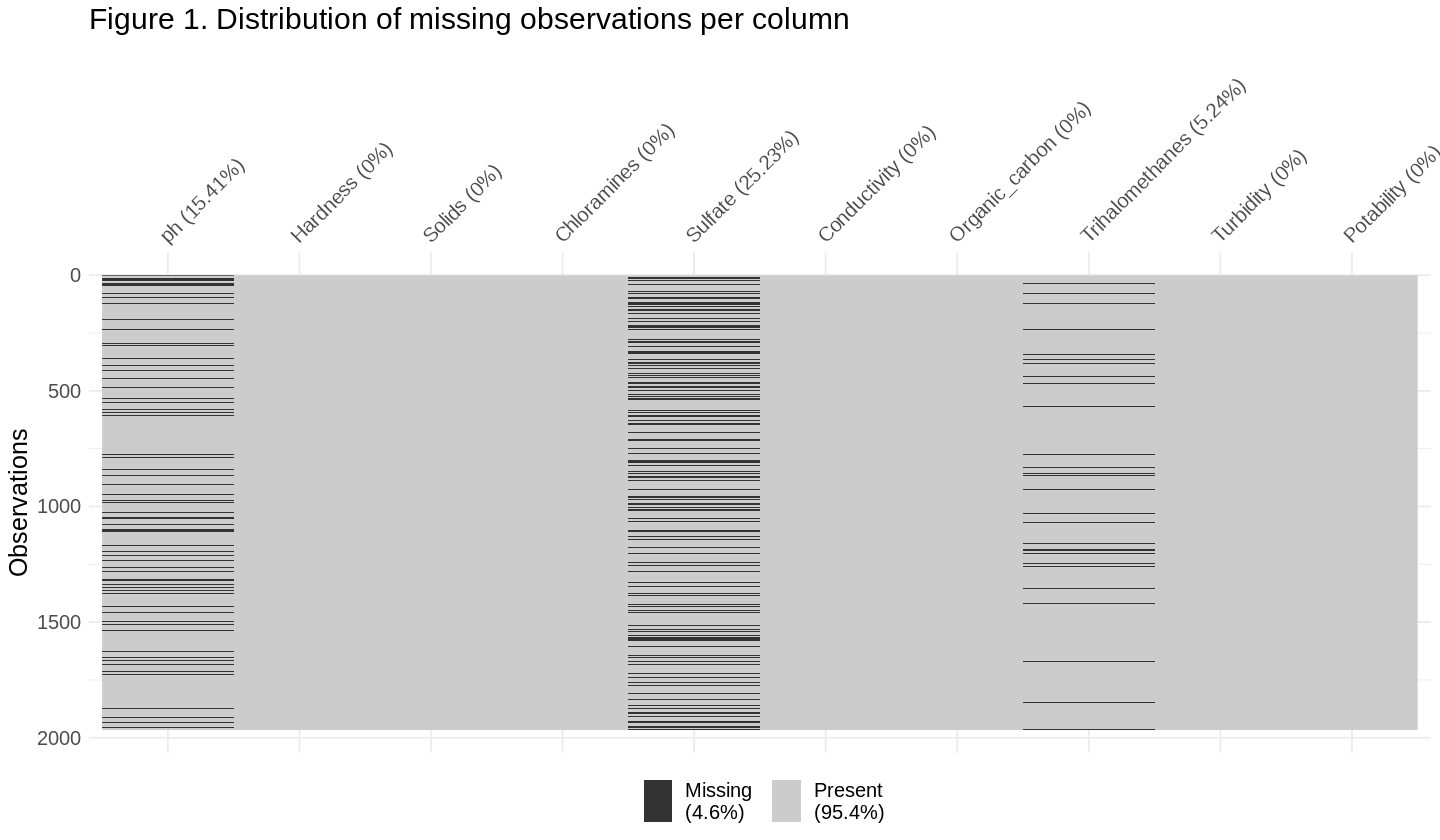

In [5]:
options(repr.plot.width=12, repr.plot.height=7)

# plot the distribution of missing rows for each column
vis_miss(water_train) +
theme(text = element_text(size=15)) +
ggtitle("Figure 1. Distribution of missing observations per column")

Figure 1 shows us that the variables ph, Sulfate and Trihalomethanes contain most of our missing data. Although we can choose to not include these 3 columns in our analysis, these variables are still key factors that affect water potability. Therefore, we will filter out the rows with missing data in these columns and let forward selection choose the most relevant variables for us.

### 1.5 Evaluating frequency and distribution of our predictors

Now, we will use histograms and box plots to determine the frequency and distribution of each variable in our dataset with respect to our target variable (Potability).

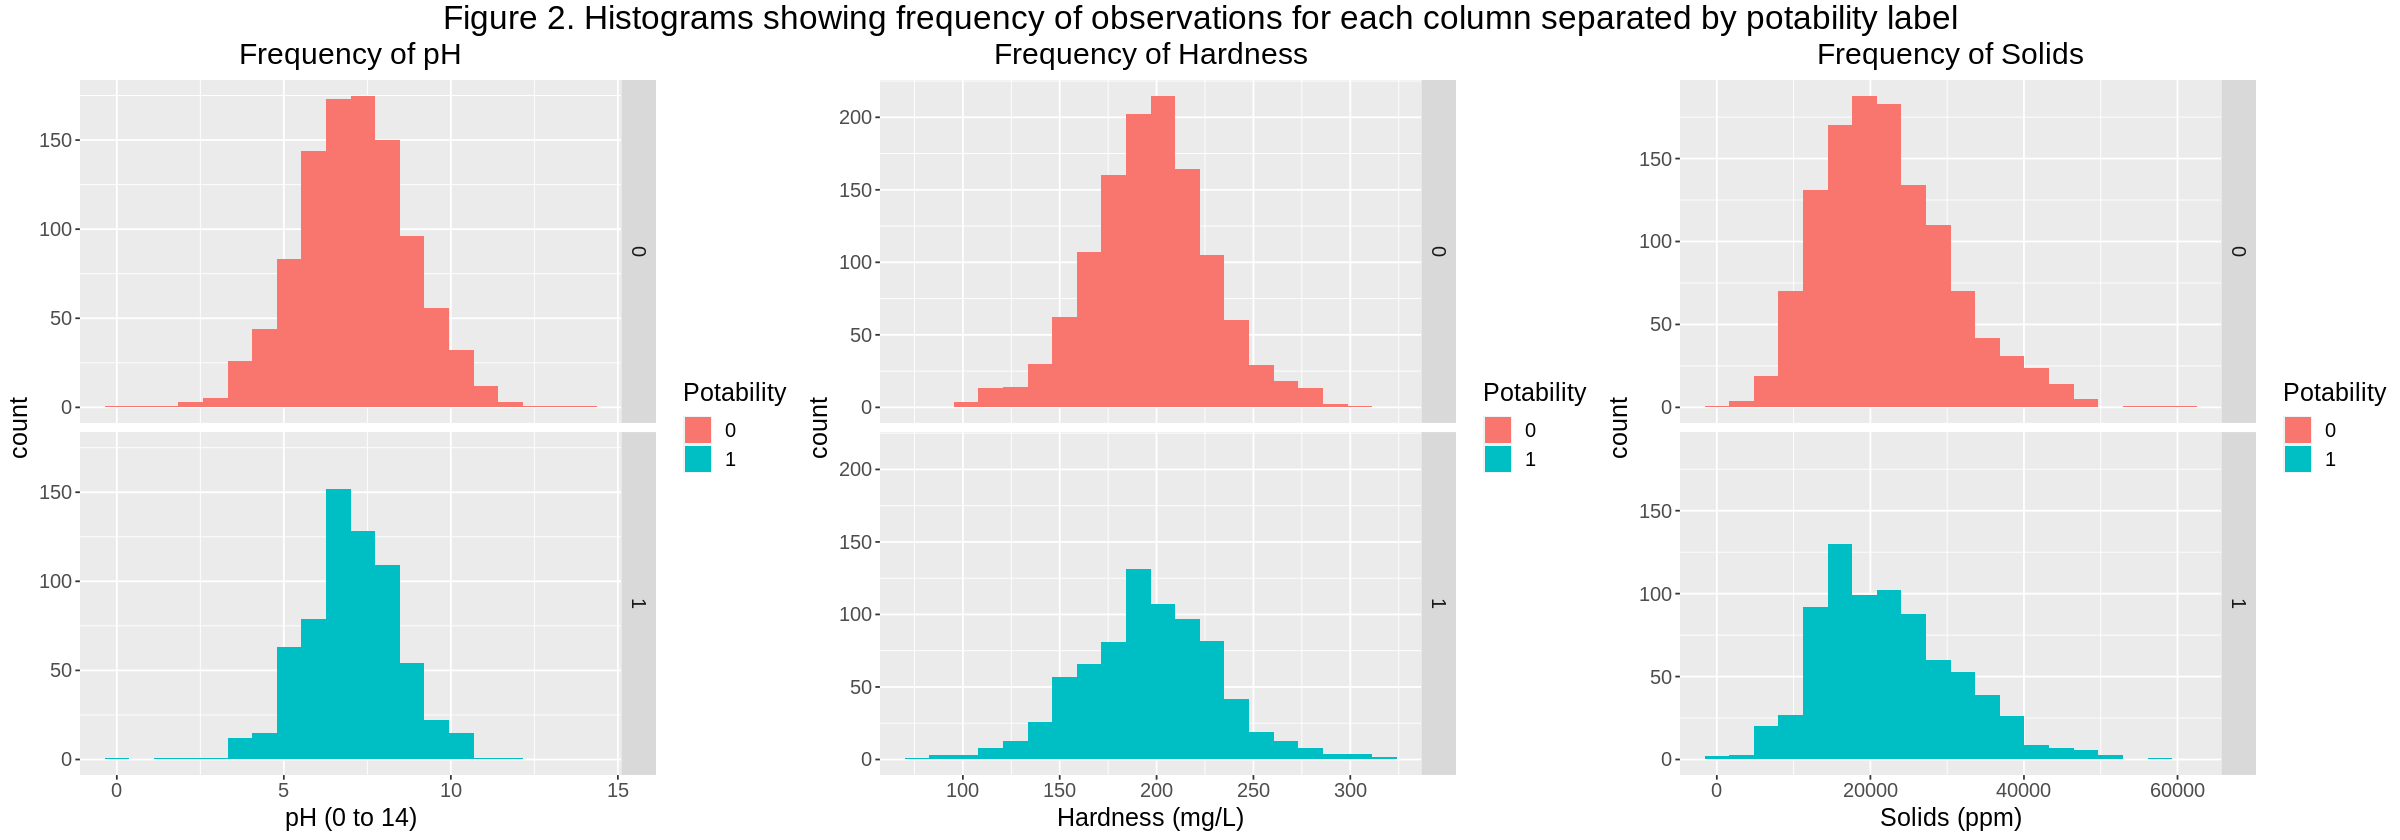

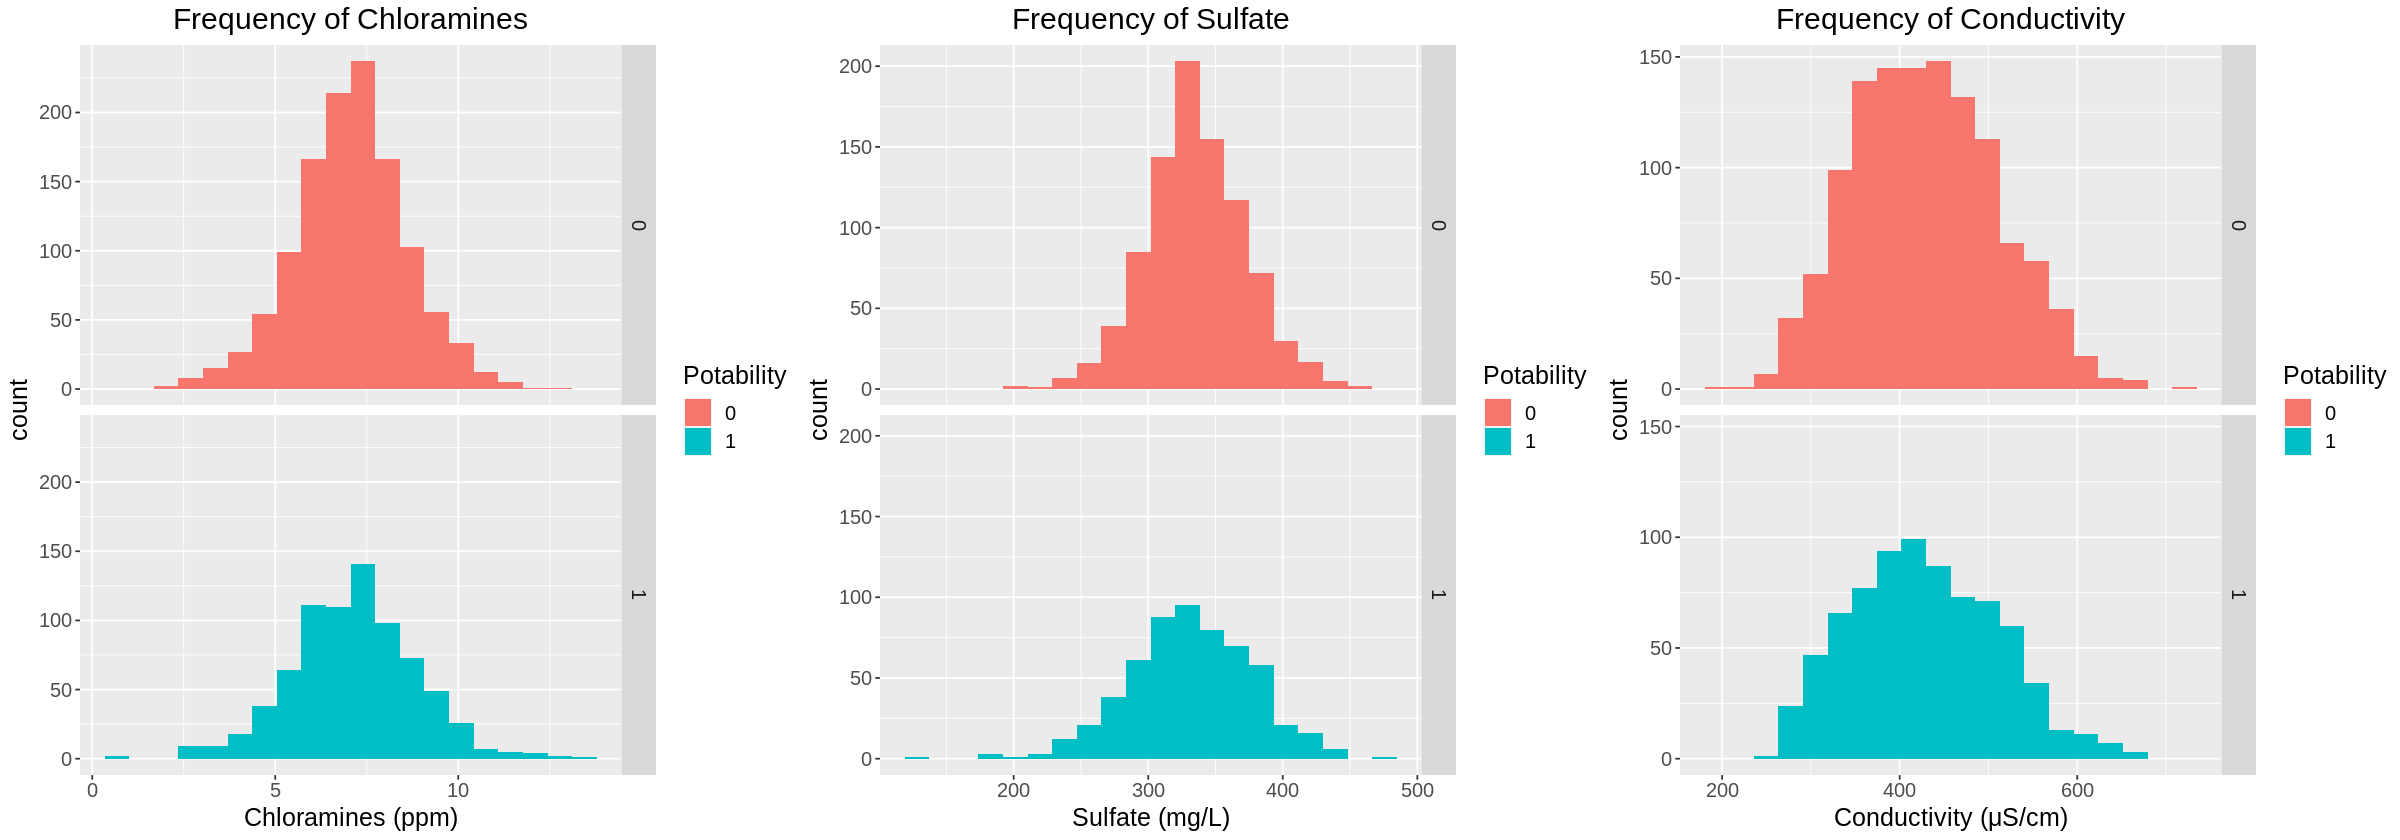

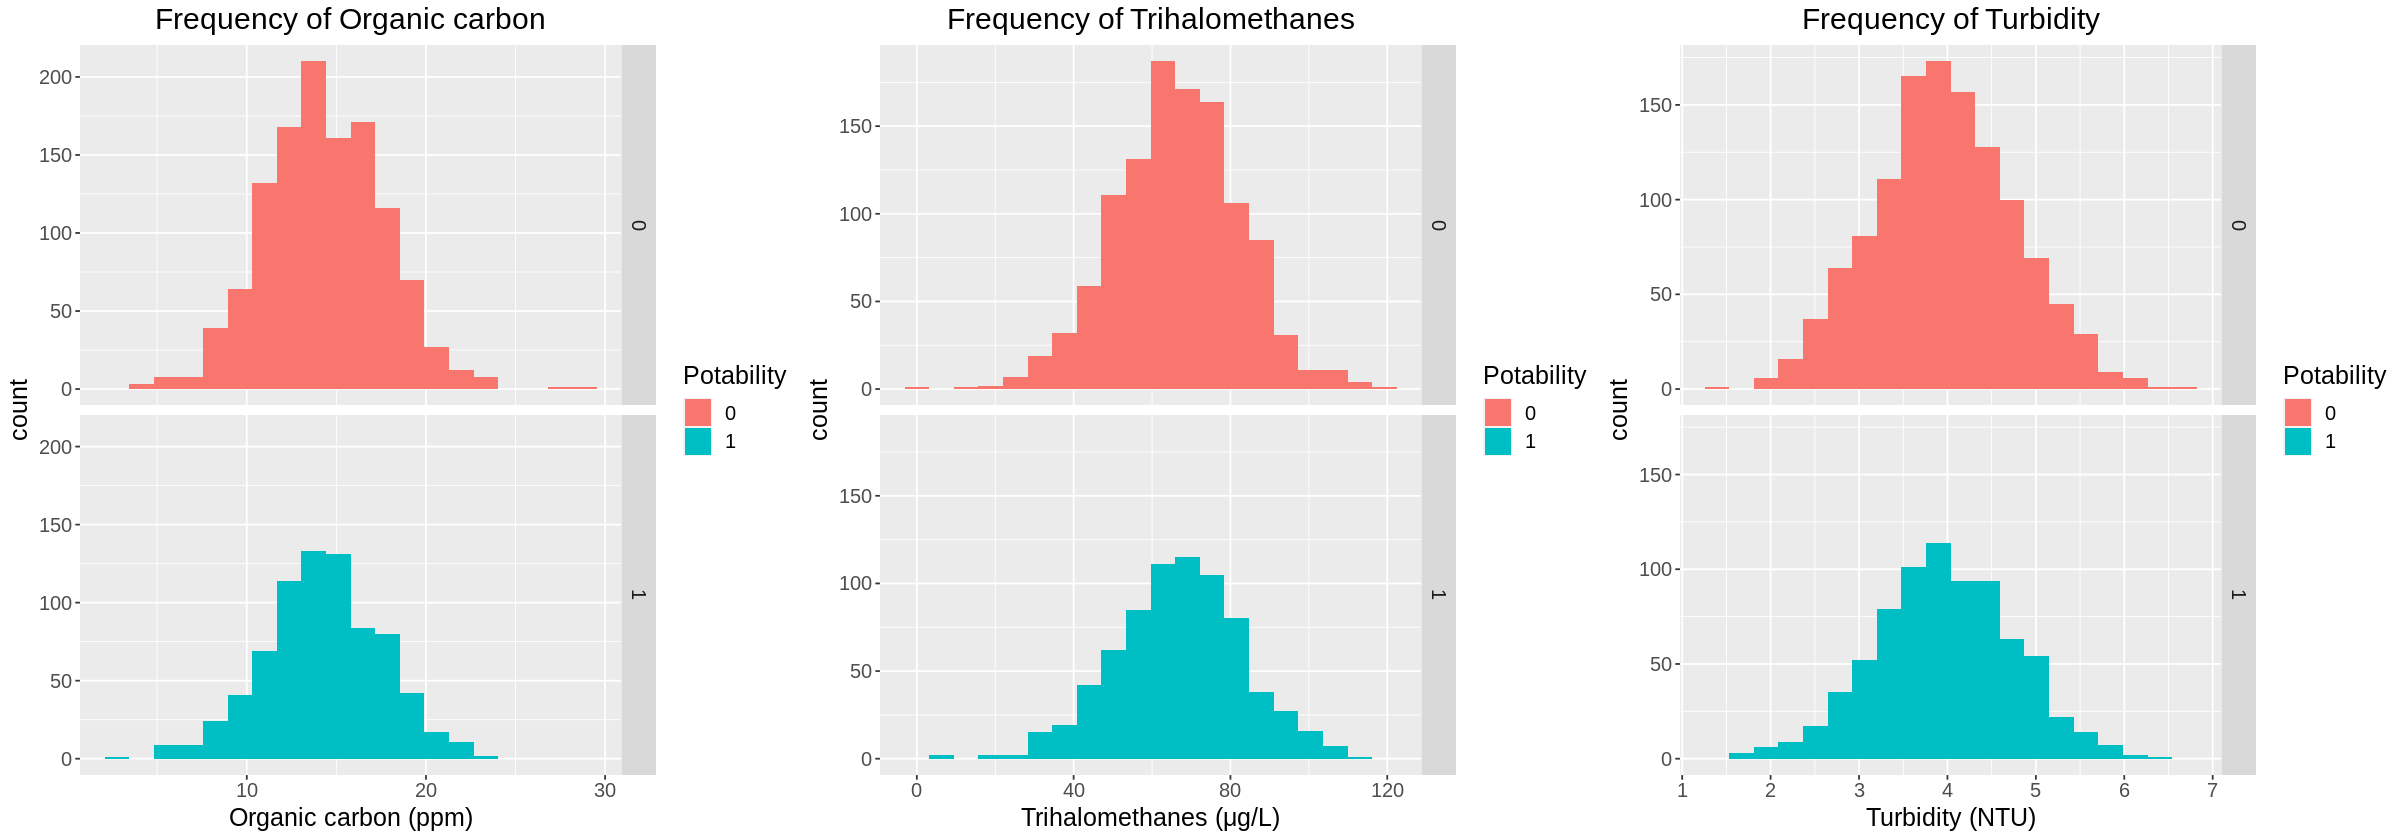

In [6]:
options(repr.plot.width=20, repr.plot.height=7)
# suppress warning messages to avoid cluttering
options(warn=-1)

water_cols <- names(water)
cols_units <- c("pH (0 to 14)", "Hardness (mg/L)", "Solids (ppm)", "Chloramines (ppm)",
               "Sulfate (mg/L)", "Conductivity (μS/cm)", "Organic carbon (ppm)",
               "Trihalomethanes (μg/L)", "Turbidity (NTU)")
histogram_titles <- c("Frequency of pH", "Frequency of Hardness", "Frequency of Solids", "Frequency of Chloramines",
                     "Frequency of Sulfate", "Frequency of Conductivity", "Frequency of Organic carbon",
                     "Frequency of Trihalomethanes", "Frequency of Turbidity")

# function used to create a histogram for given predictor, colored and separated by potability,
# with proper axes and title labels using ggplot
create_histogram = function(data_train, cols, units, titles, index) {
    histogram_plt <- ggplot(data_train, aes_string(x = cols[index])) +
        geom_histogram(aes(fill = Potability), bins=20) +
        labs(x=units[index]) + 
        ggtitle(titles[index]) +
        theme(plot.title = element_text(hjust = 0.5), text = element_text(size=15)) +
        facet_grid(rows=vars(Potability))
    return(histogram_plt)
}

# arrange the 9 histograms in 3x3 format using grid.arrange
for (col in seq(1,9,by=3)) { 
    histogram_plt1 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col)
    histogram_plt2 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col+1)
    histogram_plt3 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col+2)
    if (col == 1) {
        grid.arrange(histogram_plt1, histogram_plt2, histogram_plt3, ncol=3,
                     top=textGrob("Figure 2. Histograms showing frequency of observations for each column separated by potability label",gp=gpar(fontsize=20)) )
    } else {
        grid.arrange(histogram_plt1, histogram_plt2, histogram_plt3, ncol=3)
    }
}

# enable warnings back
options(warn=0)

From Figure 2, we can see that there are more values that are classified as class label 0 due to the class imbalance we found in Table 4. Another interesting observation is that for each variable, the peak and center of the histograms for class labels 0 and 1 are very close. For instance, both histograms for class labels 0 and 1 are centered around 7 for the variable pH. This indicates that the distribution of observations for each column is very similar regardless of whether they belong to class label 0 or 1. 

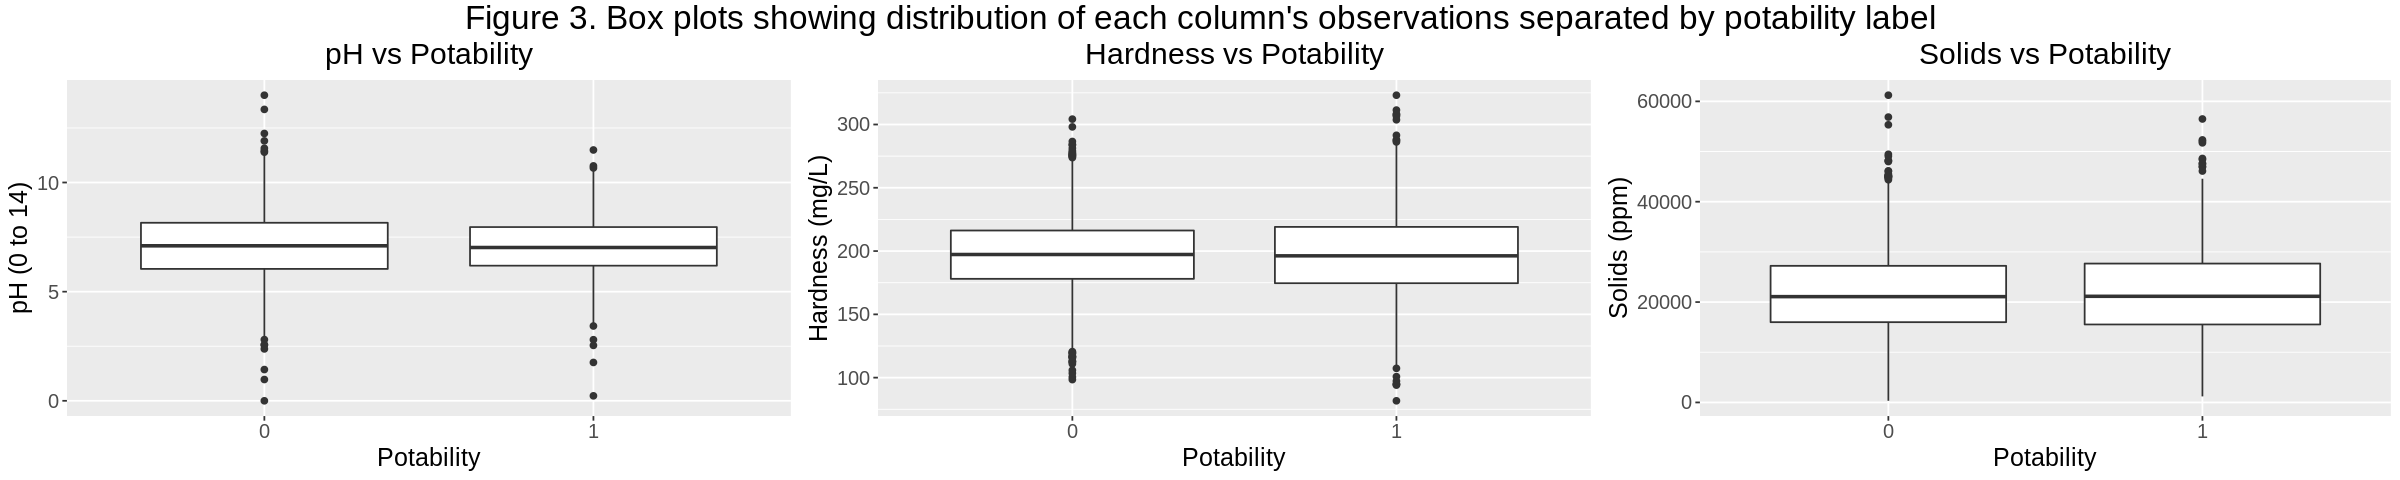

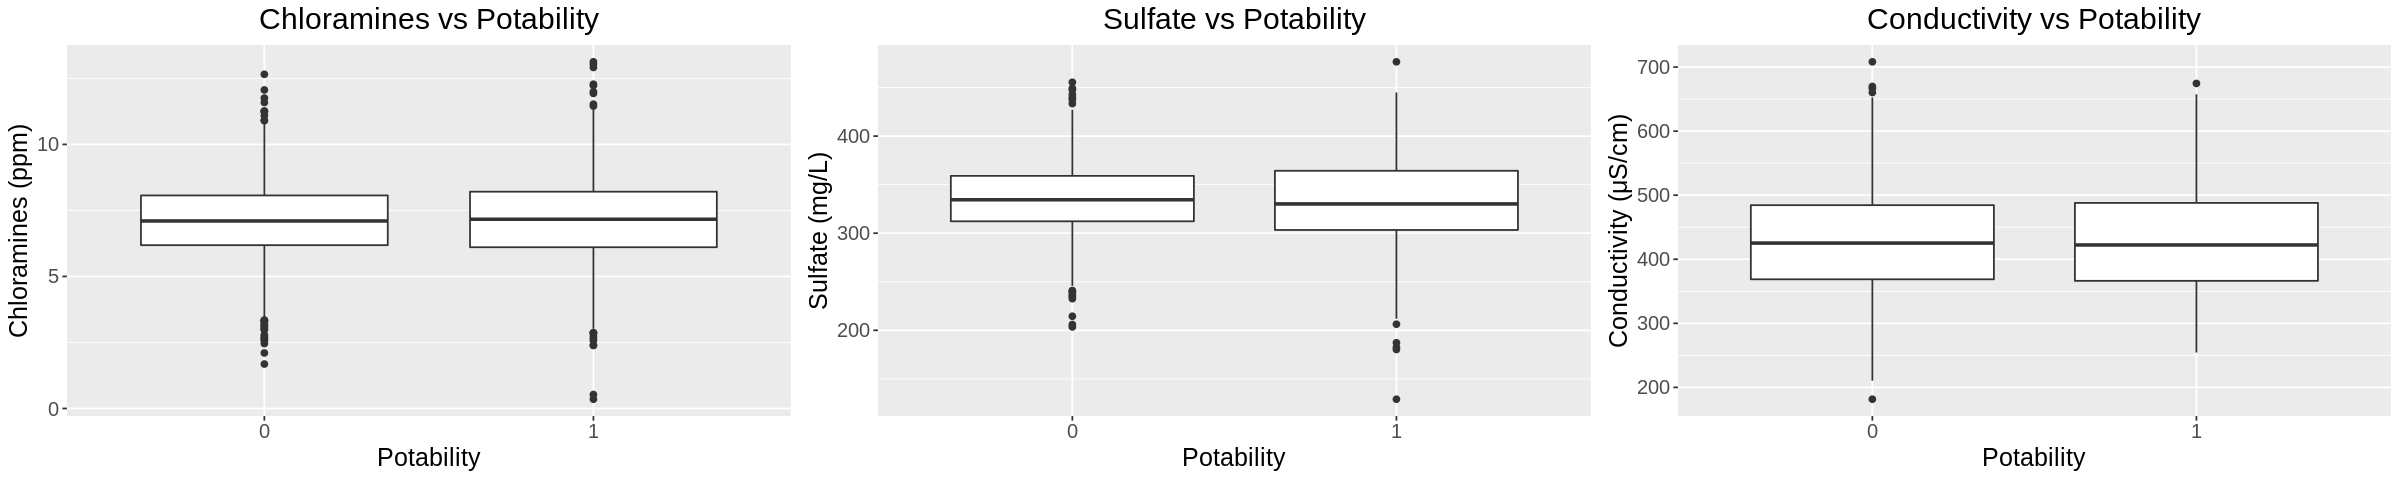

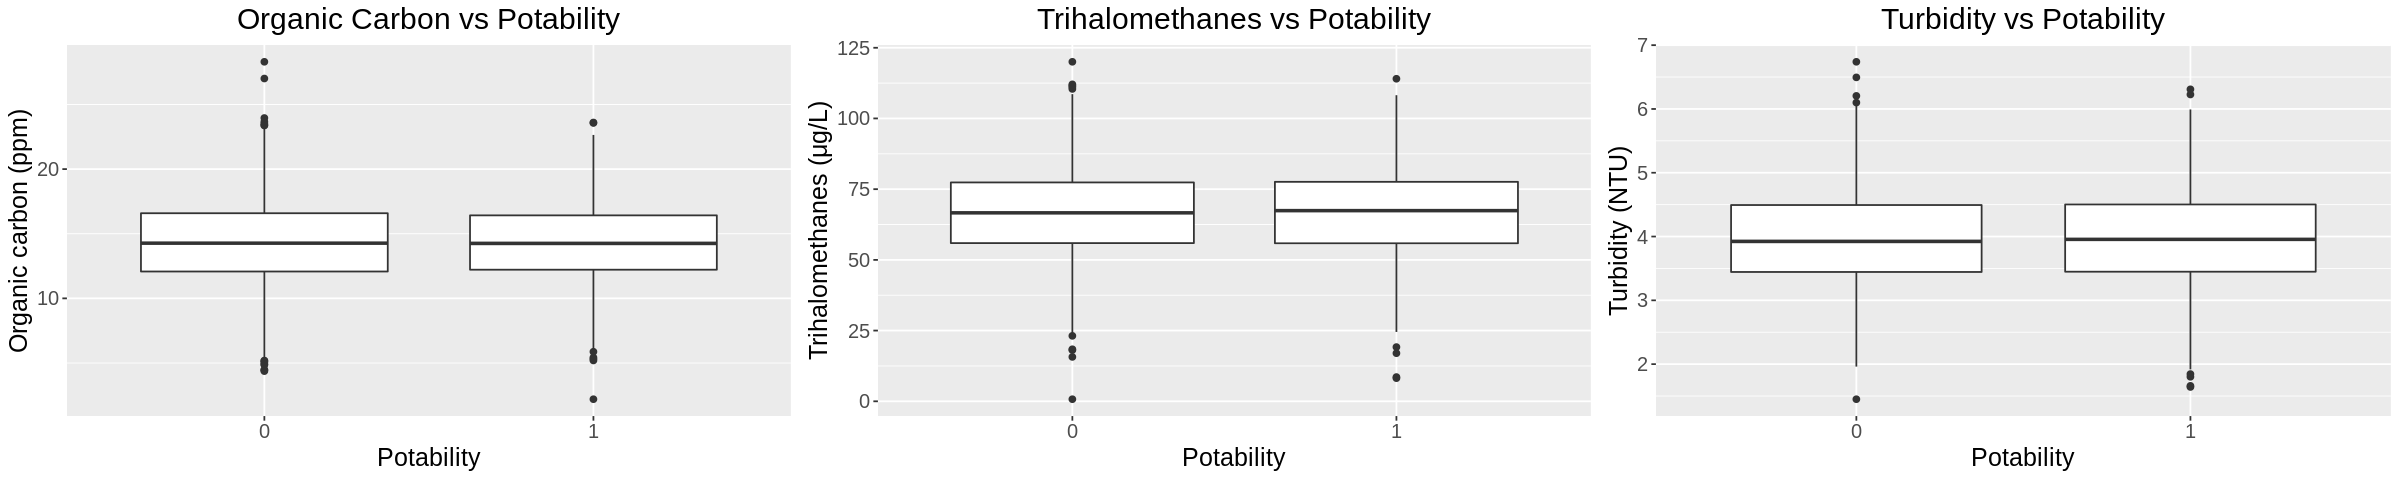

In [7]:
options(repr.plot.width = 20, repr.plot.height = 4)
# suppress warning messages to avoid cluttering
options(warn=-1)

# create boxplot titles 
boxplot_titles <- c("pH vs Potability", "Hardness vs Potability", "Solids vs Potability", "Chloramines vs Potability",
                    "Sulfate vs Potability", "Conductivity vs Potability", "Organic Carbon vs Potability",
                   "Trihalomethanes vs Potability", "Turbidity vs Potability")


# function used to create a boxplot for given predictor vs potability with proper axes and title labels using ggplot
create_boxplot <- function(data_train, cols, units, titles, index) {
    boxplt <- ggplot(data_train, aes_string(x="Potability", y=cols[index])) +
    geom_boxplot()  +
    labs(y = units[index]) + 
    ggtitle(titles[index]) +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size=15))
    return(boxplt)
}

# arrange the 9 box plots in 3x3 format using grid.arrange

for (col in seq(1,9,by=3)) { 
    boxplot1 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col)
    boxplot2 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col+1)
    boxplot3 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col+2)
    if (col == 1) {
        grid.arrange(boxplot1, boxplot2, boxplot3, ncol=3, 
                     top=textGrob("Figure 3. Box plots showing distribution of each column's observations separated by potability label",gp=gpar(fontsize=20)) )
    } else {
        grid.arrange(boxplot1, boxplot2, boxplot3, ncol=3)
    }
    
}

# enable warnings back
options(warn=0)

These box plots provide us with a visual summary of our training data to help us identify the median values, dispersion of data and outliers. Similar to Tables 5, 6, and 7, these box plots show that the range of values for each column varies greatly even if we disregard the outliers. Thus, we should standardize all predictors so that each predictor influences the distances calculated in KNN equally.

### 1.5 Creating a correlation matrix for each pair of predictors

To summarize the relationships between variables in the dataset, we create a correlation matrix. It can help us identify pairs of variables with relatively high correlation coefficients so that we can avoid using similar variables in our analysis since their contribution would be similar.

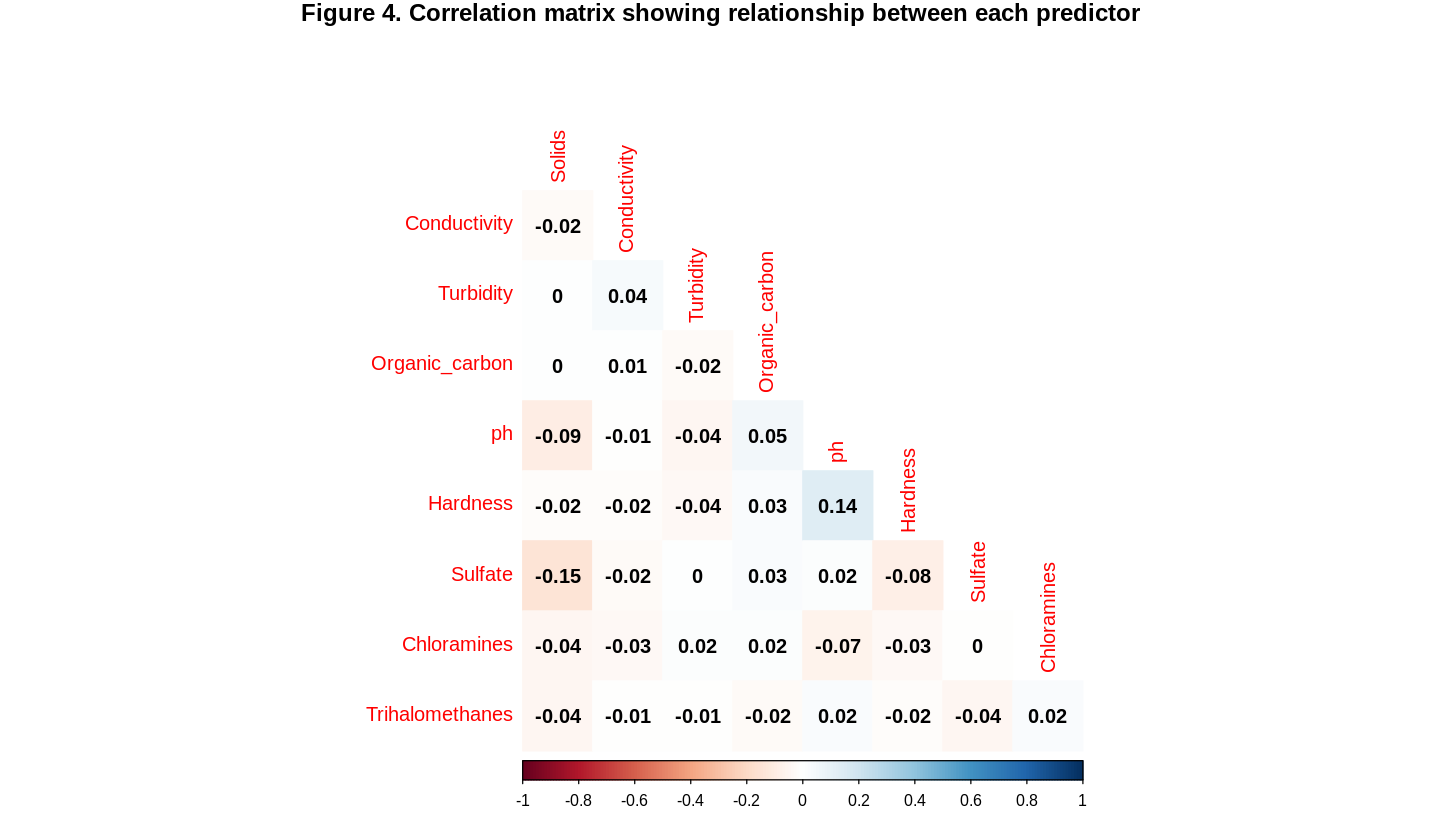

In [8]:
# Create a correlation matrix to show correlation coefficients between variables
water_train_wo_na <- water_train %>%
    select(- Potability) %>%
    drop_na()

cor_matrix <- cor(water_train_wo_na)

options(repr.plot.width=12, repr.plot.height=7)
# Plot the above correlation matrix

corrplot(cor_matrix, method = 'color', diag = FALSE, 
         type = "lower", order = "hclust", 
         title = 'Figure 4. Correlation matrix showing relationship between each predictor',
         addCoef.col = "black",
         mar = c(0,0,1,0)) 

This matrix shows that the correlation coefficient between any two predictors has a magnitude of at most 0.15, which indicates that every pair of predictors shows a very weak relationship with each other. As a result, it is not very obvious which predictor we should not use to build our model since all of our predictors appear to have different distributions. This is where forward selection will help us choose the best subset of columns.

### 1.6 Summarizing visualization of the relationship between all columns

We use the ggpairs function to explore the relationship between all predictors and our target variable.

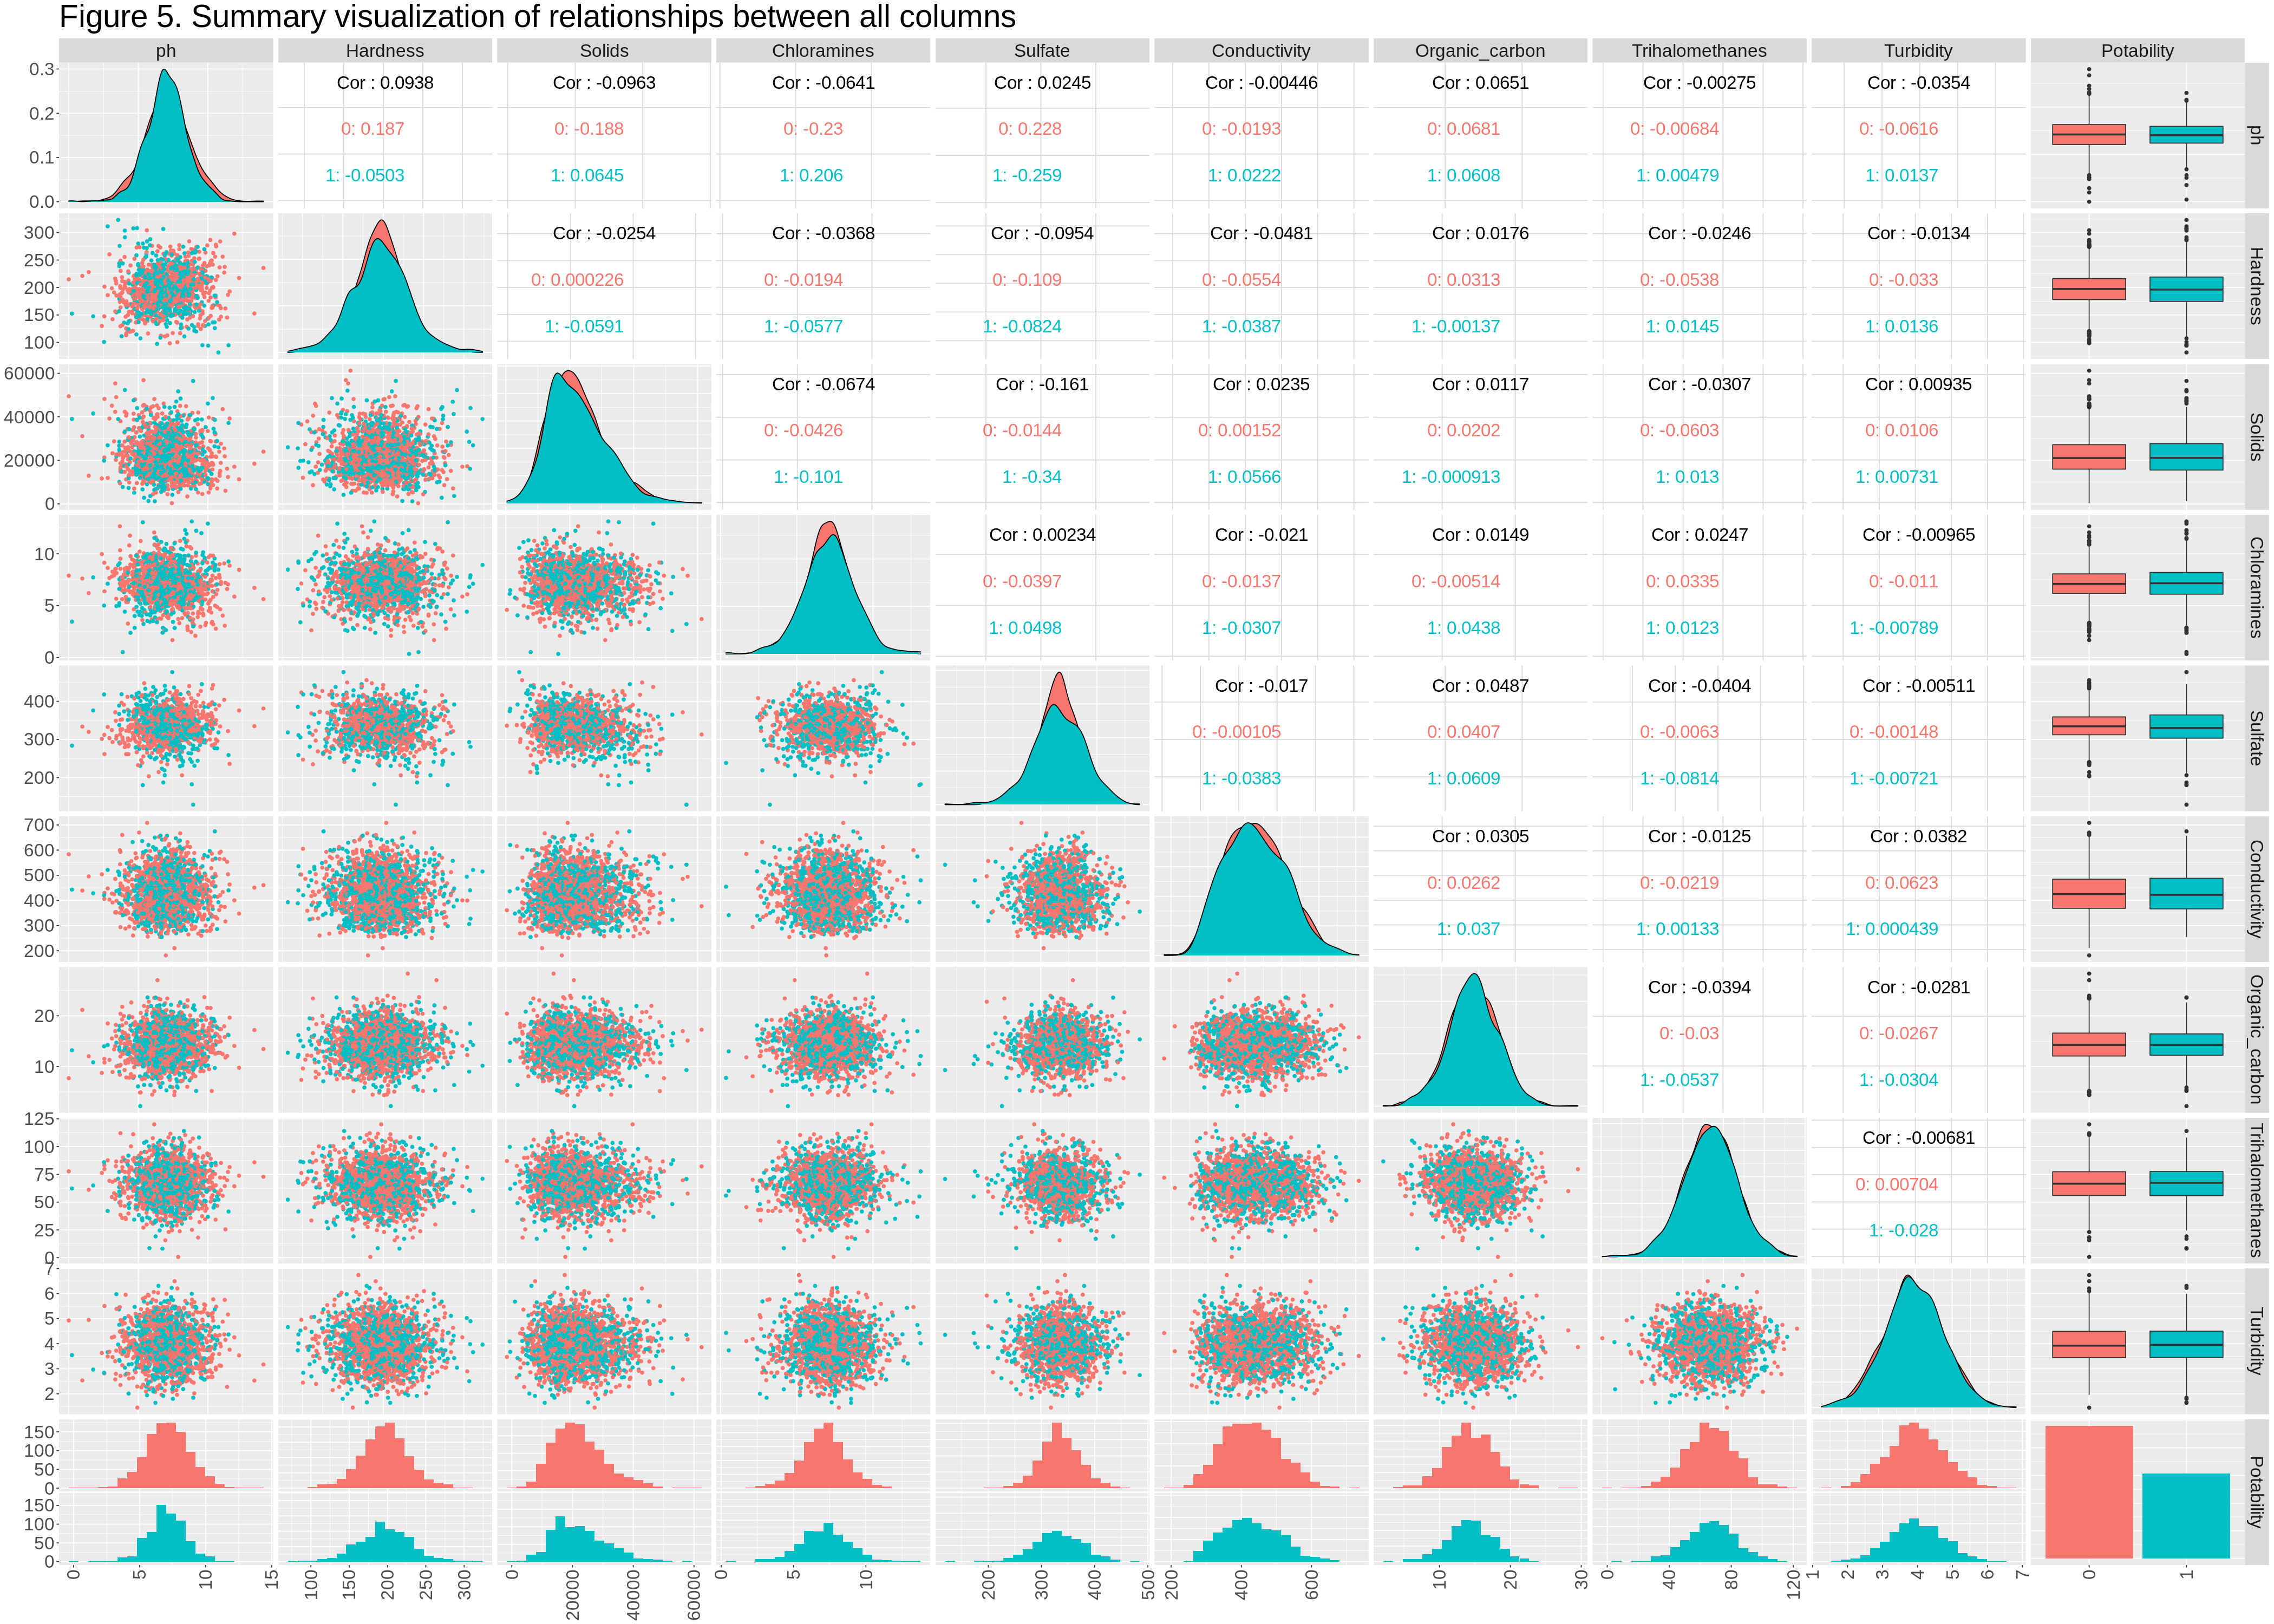

In [9]:
options(repr.plot.width = 35, repr.plot.height = 25)
# suppress warning messages to avoid cluttering
options(warn=-1)

# use ggpairs to plot relationship between all columns
ggpairs_1 <- ggpairs(water_train, 
                     columns = 1:10, aes(colour = Potability), 
                     lower = list(combo = wrap("facethist", bins = 20)),  
                     upper = list(continuous = wrap("cor", size = 7)),
                     title="Figure 5. Summary visualization of relationships between all columns") + 
                theme(plot.title = element_text(size=35),
                    text = element_text(size=25),
                    axis.text.x= element_text(angle = 90, vjust = 0.5, hjust=1))
ggpairs_1

# enable warnings back
options(warn=0)

Figure 5 shows a summary of the histograms, box plots, and correlation matrix condensed into a single plot to help visualize everything together. It also shows scatter plots of the relationship between each pair of columns colored by the Potability label. Similar to the correlation matrix, the scatterplots indicate that there is no strong relationship between any pair of columns and that there are no discernible patterns between class labels 0 or 1.

## 2. Predictive Data Analysis

### 2.1 Filtering missing values

We will now filter out the rows with NA values in both our training and testing data.

In [10]:
# filter N/A values in training and testing set 
water_train <- water_train %>%
            drop_na()
print("Table 8. Training data without N/A values")
water_train

water_test <- water_test %>%
            drop_na()
print("Table 9. Testing data without N/A values")
water_test

[1] "Table 8. Training data without N/A values"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0
10.223862,248.0717,28749.72,7.513408,393.6634,283.6516,13.789695,84.60356,2.672989,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.702547,207.32109,17246.92,7.708117,304.5102,329.2660,16.21730,28.87860,3.442983,1
11.491011,94.81255,37188.83,9.263166,258.9306,439.8936,16.17276,41.55850,4.369264,1
4.668102,193.68174,47580.99,7.166639,359.9486,526.4242,13.89442,66.68769,4.435821,1


[1] "Table 9. Testing data without N/A values"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.55828,31.99799,4.075075,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.36382,62.79831,4.401425,0
7.119824,156.7050,18730.81,3.606036,282.3441,347.7150,15.92954,79.50078,3.445756,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5.893103,239.2695,20526.67,6.349561,341.2564,403.6176,18.96371,63.84632,4.390702,1
8.197353,203.1051,27701.79,6.472914,328.8868,444.6127,14.25088,62.90621,3.361833,1
6.069616,186.6590,26138.78,7.747547,345.7003,415.8870,12.06762,60.41992,3.669712,1


### 2.2 Choosing best columns using Forward Selection

From Table 4, we observed that class label 0 is more prevalent in the training data. To resolve this class imbalance, we apply upsampling while building the recipe. We will also standardize the training data because not all columns have the same mean and range.

We initially decided to use all columns in our dataset because they all describe water quality. For instance, pH can be a useful predictor for us because extremely high or low levels of pH can make water unsafe from the get-go. The presence of compounds such as solids and sulfate can further affect water quality. Columns such as hardness, turbidity, and conductivity can directly tell us about the properties the water holds. Since the correlation matrix indicated that there is no high correlation between any pair of variables, we use forward selection to find a subset of predictors which provides the highest accuracy for our model.

In [11]:
names <- colnames(water_train %>% select(-Potability))

water_formula <- paste("Potability", "~", paste(names, collapse="+"))
water_formula

[1] "Potability ~ ph+Hardness+Solids+Chloramines+Sulfate+Conductivity+Organic_carbon+Trihalomethanes+Turbidity"

In [12]:
options(repr.matrix.max.rows = 10)

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 10-fold cross-validation object
water_vfold <- vfold_cv(water_train, v = 10, strata = Potability)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Potability", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        water_recipe <- recipe(as.formula(model_string), 
                                data = water_train) %>%
                          step_upsample(Potability, over_ratio = 1) %>% 
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(water_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = water_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

print("Table 10. Accuracy table for different number of columns used")
accuracies

[1] "Table 10. Accuracy table for different number of columns used"


size,model_string,accuracy
<int>,<chr>,<dbl>
1,Potability ~ Conductivity,0.5660595
2,Potability ~ Conductivity+Solids,0.5591275
3,Potability ~ Conductivity+Solids+Sulfate,0.5566064
4,Potability ~ Conductivity+Solids+Sulfate+ph,0.5736214
5,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon,0.6214865
6,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness,0.6342427
7,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes,0.6376256
8,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes+Chloramines,0.6299831
9,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes+Chloramines+Turbidity,0.6308974


We now use a line plot to visualize how the accuracy of the model varies with the number of predictors. 

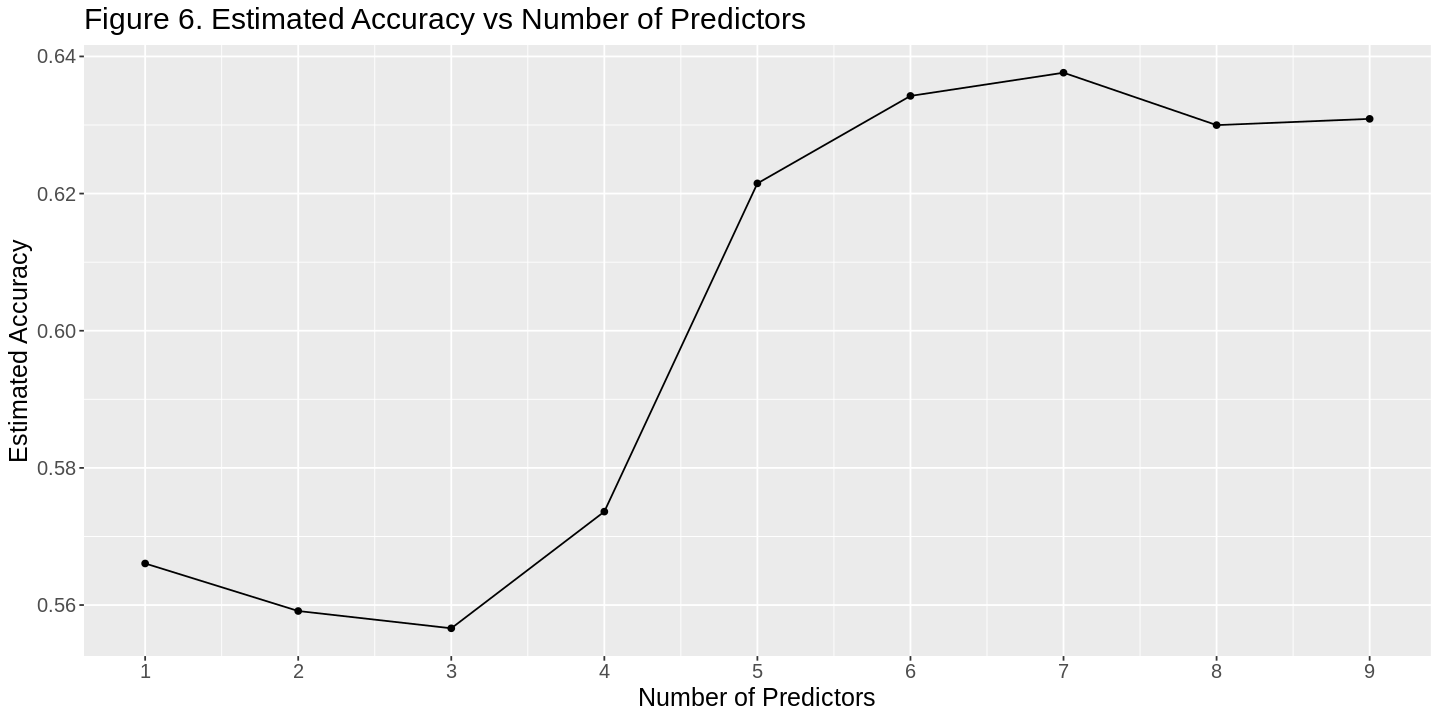

In [13]:
options(repr.plot.width=12, repr.plot.height=6)
# plot estimated accuracy versus the number of predictors
forward_selection_plot <- accuracies %>%
    ggplot(aes(x = size, y = accuracy)) +
    geom_point() +
    geom_line() +
    labs(x = 'Number of Predictors', y = 'Estimated Accuracy') +
    scale_x_continuous(breaks = seq(1, 9, 1)) +
    ggtitle('Figure 6. Estimated Accuracy vs Number of Predictors') + 
    theme(text = element_text(size = 15))

forward_selection_plot

Figure 6 shows that having 7 predictors yields the highest accuracy. This could be due to some predictor variables having more power than others.

Next, we want to show which are the 7 predictors that yield the highest accuracy. 

In [14]:
# show the subset of predictors which has the highest accuracy
best_subset <- accuracies %>%
    filter(accuracy == max(accuracy)) %>%
    slice(1)
print("Table 11. Accuracy table for best subset of columns chosen by forward selection")
best_subset

[1] "Table 11. Accuracy table for best subset of columns chosen by forward selection"


size,model_string,accuracy
<int>,<chr>,<dbl>
7,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes,0.6376256


From Table 11, we can observe that the Conductivity, Solids, Sulfate, pH, Organic Carbon, Hardness and Trihalomethanes variables have the highest accuracy (0.6376), therefore we will only include these columns in our data analysis. This result is interesting because one would normally think that including more predictors such as the Chloramines and Turbidity of water would help us better predict water Potability; however, this is not the case. A reason for this could be that the other variables might have similar contributions while determining water potability, therefore it would be redundant to include all of them.

### 2.3 Cross validation and hyperparameter tuning

To find the best $k$ value, we will be tuning $k$ using values between 1 and 100 with a step size of 10 in a 10-fold cross-validation. Trying values between 1 and 100 for $k$  will help us observe any trends in how the accuracy varies as we increase $k$ . We set the upper bound to be 100 since larger values will increase the time it takes to train our model. Additionally, we chose to use 10 folds because if we were to do a single split into the training and validation sets, we might get higher accuracy for some $k$  by chance. Using 10 folds will help us reduce the variability among the accuracies of different validation sets. 

In [15]:
# build the knn model using training set 
water_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
              set_engine("kknn")%>%
              set_mode("classification")

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by= 10))

# building recipe 
water_recipe <- recipe(Potability ~ Conductivity + Solids + 
                       Sulfate + ph + Organic_carbon + 
                       Hardness + Trihalomethanes, data = water_train)%>%
                step_upsample(Potability, over_ratio = 1) %>% 
                step_scale(all_predictors())%>%
                step_center(all_predictors())

# deciding the number of folds for cross validation 
water_vfold <- vfold_cv(water_train, v= 10, strata = Potability)

# workflow using cross validation and then collect metrics
water_fit <- workflow()%>%
             add_recipe(water_recipe)%>%
             add_model(water_spec)%>%
             tune_grid(resamples = water_vfold, grid= gridvals)%>%
             collect_metrics() %>%
             filter(.metric == "accuracy")          

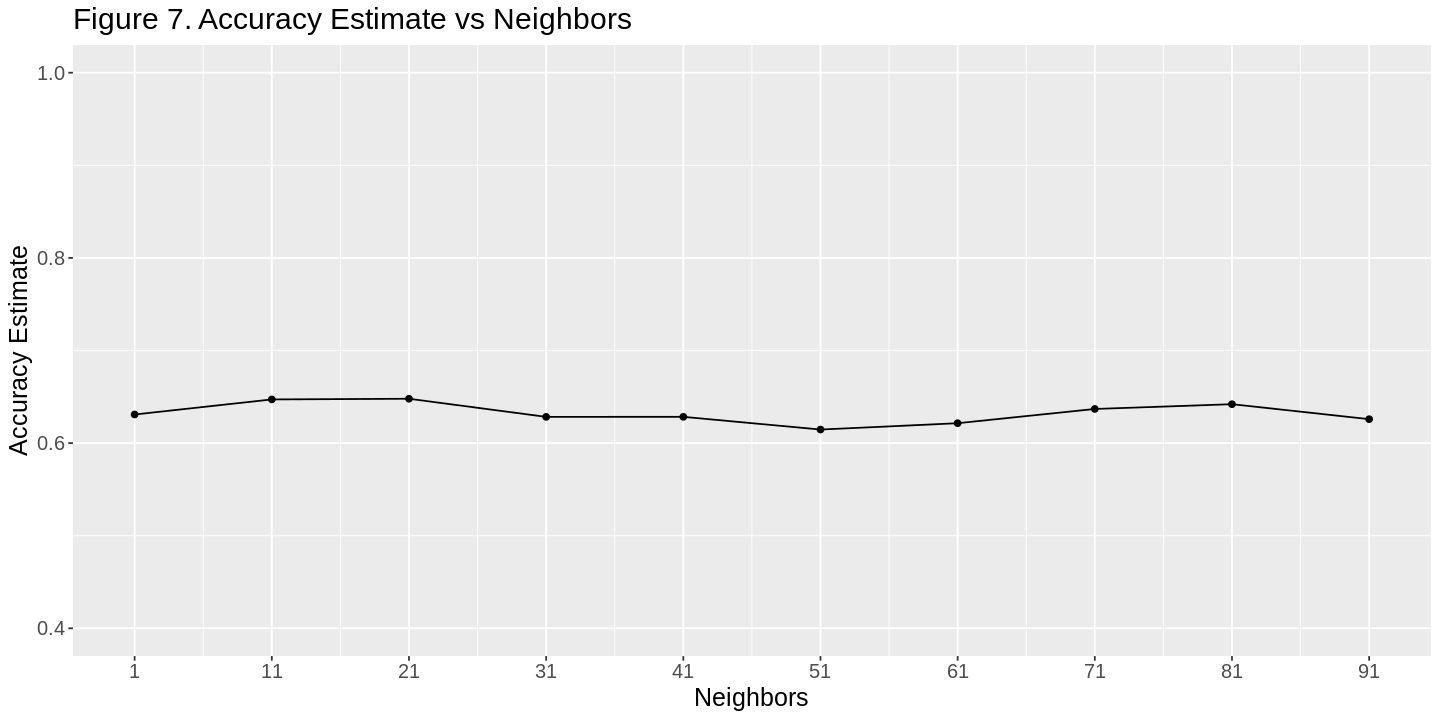

In [16]:
options(repr.plot.width=12, repr.plot.height=6)
water_accuracy_plot <- ggplot(water_fit, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(1, 100, by=10)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis
      theme(text = element_text(size = 15)) +
      ggtitle("Figure 7. Accuracy Estimate vs Neighbors")

water_accuracy_plot

In [17]:
options(repr.matrix.max.rows = 10)
print("Table 12. Accuracy table for different k values for KNN")
arrange(water_fit, desc(mean)) 

[1] "Table 12. Accuracy table for different k values for KNN"


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,accuracy,binary,0.6478966,10,0.012993520,Model03
11,accuracy,binary,0.6471657,10,0.011200025,Model02
81,accuracy,binary,0.6420156,10,0.007875105,Model09
71,accuracy,binary,0.6368873,10,0.011781155,Model08
1,accuracy,binary,0.6309190,10,0.014746862,Model01
41,accuracy,binary,0.6283684,10,0.014408585,Model05
31,accuracy,binary,0.6283251,10,0.010158209,Model04
91,accuracy,binary,0.6258559,10,0.011150218,Model10
61,accuracy,binary,0.6214874,10,0.012399584,Model07


Figure 7 and Table 12 show that the best $k$ value is 21 since it provides the highest accuracy and changing $k$ to its nearby values does not decrease accuracy by a lot. We observe that all of the $k$ values seem to provide very close accuracies, so practically any of the $k$ values from Table 12 could work. However, choosing larger values of $k$ would increase the running time without providing much more accuracy. Therefore, 21 seems like a reasonable value to select for $k$ as it is not too large and it also provides the highest accuracy.

### 2.4 Building model with best $k$ value

We now build our final model using $k=21$.

In [18]:
# create knn model with best k
best_spec <- nearest_neighbor(weight_func="rectangular", neighbors=21) %>% 
            set_engine("kknn") %>% 
            set_mode("classification")

# fit best knn model
best_fit <- workflow() %>% 
            add_recipe(water_recipe) %>% 
            add_model(best_spec) %>% 
            fit(water_train)

### 2.5 Making predictions using testing set

Using our model, we will make predictions on the testing set and compute the accuracy of our model by comparing the predicted labels against the truth labels.

In [19]:
# compute accuracy using test data
predictions <- predict(best_fit, water_test) %>% 
            bind_cols(water_test)

pred_accuracy <- predictions %>% 
            metrics(truth = Potability, estimate =.pred_class) %>% 
            filter(.metric =="accuracy")
print("Table 13. Accuracy table for final KNN model")
pred_accuracy

[1] "Table 13. Accuracy table for final KNN model"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6038186


Table 13 shows us that the accuracy of our final KNN model is 60.38%. In our exploratory data analysis, we calculated the proportions of each Potability label and we saw that the majority label was 0. A baseline accuracy for our model would be to predict the majority classifier, which would give us an accuracy of approximately 60.99% (i.e. the proportion of class label 0 in the training data). The accuracy of our model is lower than just predicting the majority label, which shows that our model did a very poor job predicting potability.

### 2.6 Visualizing our results

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



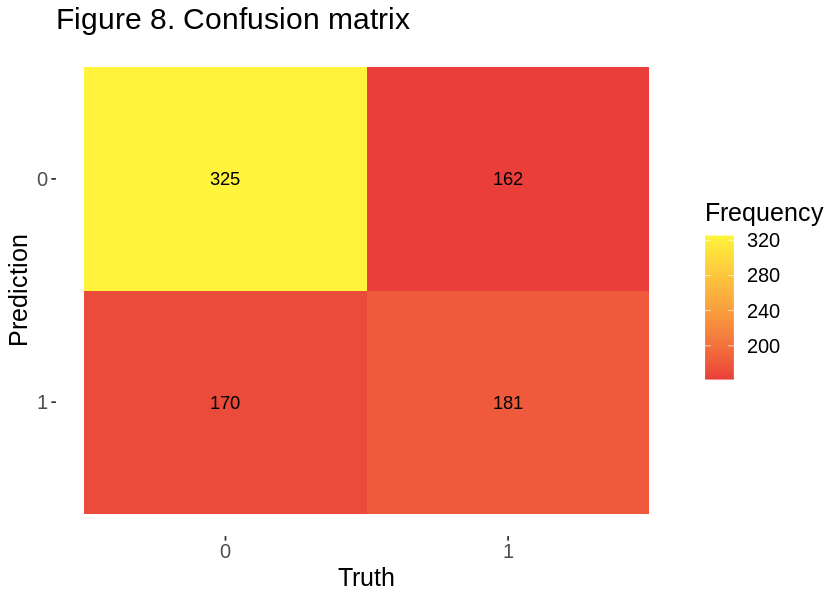

In [20]:
options(repr.plot.width=7, repr.plot.height=5)

# create confusion matrix
conf_m <- predictions %>% conf_mat(truth=Potability, estimate =.pred_class)

# plot confusion matrix
autoplot(conf_m, type="heatmap") +
    scale_fill_gradient(low = "#e93e3a", high = "#fff33b") +
    theme(text = element_text(size=15), legend.position = "right") +
    ggtitle("Figure 8. Confusion matrix") +
    labs(fill="Frequency")
    

From Figure 8, we can observe that the number of true positives is 181 and the number of true negatives is 325. In addition, the number of false negatives is 162 and the number of false positives is 170. Ideally, we would want the number of true positives and the true negatives to be much higher than the number of false positives and false negatives that we currently have. 

Even though both false positives and false negatives are not desirable, in the context of predicting the water potability, false positives are less desirable than false negatives. Our model predicts higher false positives than false negatives, which is a critical issue as the consumption of non-potable water which was classified as "potable" can cause serious health issues. 

Recall and precision scores can be computed to better understand our results. From Figure 8, the recall is $\frac{181}{181+162}=0.5277$ and the precision is $\frac{181}{181+170}=0.5157$. The recall score tells us that we only classified 52.77% of the truth label 1 correctly and the precision score tells us that 51.57% of our predictions as label 1 are correct.

## 3. Discussion

In our exploratory data analysis, we observed that some predictor variables had very different distributions from each other. Additionally, the histograms showed that each variable had similar frequency distributions for class label 0 and 1, and there was no strong relationship among variables that could be identified from the scatter plots and correlation matrix. 

The best subset of variables chosen by forward selection included Conductivity, Solids, Sulfate, pH, Organic Carbon, Hardness and Trihalomethanes. We saw that different values of $k$ produced similar accuracies, but the highest accuracy was given by $k=21$. When predicting on the testing set, our final model produced an accuracy lower than the accuracy of the  majority classifier and visualizing our results showed that our model had many false positives. This suggests that our final model was not very good at predicting unseen data. This was expected since we observed that there were no particular trends for the distributions of our variables in potable and non-potable water in our exploratory analysis. Moreover, a possible reason behind the low accuracy could be due to our model underfitting our data as it was not learning enough from our training dataset. This could be improved by having a larger training set which could have helped train a better model. Since KNN simply calculates distances between observations, it might not have been able to detect patterns for class labels 0 and 1 because potability does not influence each variable's distribution in water. Perhaps other algorithms such as binary logistic regression can perform better since the correlation among independent variables is not very high.

Since Dr. Doe's research relies on the predictions made by our model, a low predicting accuracy could have detrimental effects on human health. If we classify a non-potable water body as potable, it could affect the health of children who consume this water in Nigeria. Based on our analysis, we can help Dr. Doe and his team of health associates predict potability with only 60.38% accuracy. Despite this, our findings could encourage them to further investigate the chemical properties of the variables we used to build our model. Furthermore, our findings suggest the need for more training data to be included in our KNN model so that our model identifies the trends of the distributions from different chemicals in water and makes more accurate predictions. 

With a better model, this study can open doors for further research to determine how a specific chemical compound/pollutant affects water quality as compared to the presence of natural chemicals in the water. Moreover, it can encourage scientists to use better methods for collecting higher quality data concerning the chemical composition of different water bodies and explore questions such as:
- How can we sanitize polluted water without extracting its natural minerals? 
- How can we safely distribute water considering the possibility of high false positives from predictive models?
- How can we collect better observations to produce more accurate models?

## 4. Sources

* Dataset retrieved from: https://www.kaggle.com/adityakadiwal/water-potability
* Canada, G. A. (2017, July 26). Government of Canada. GAC. Retrieved April 8, 2022, from https://www.international.gc.ca/world-monde/issues_development-enjeux_developpement/environmental_protection-protection_environnement/water-eau.aspx?lang=eng
* Dubay, A. (2021, July 6). Waterborne disease facts and how to help. World Vision Canada. Retrieved April 8, 2022, from https://www.worldvision.ca/stories/clean-water/cholera-waterborne-disease-facts#:~:text=Types%20of%20waterborne%20diseases%20include,can%20lead%20to%20severe%20dehydration
* Mekonnen, M. M., & Hoekstra, A. Y. (2016). Four billion people facing severe water scarcity. Science Advances, 2(2).         https://doi.org/10.1126/sciadv.1500323
* United Nations. (n.d.). Water. United Nations. Retrieved February 24, 2022, from https://www.un.org/en/global-issues/water 
* U.-W. (n.d.). About United Nations Water. UN-Water. https://www.unwater.org/about-unwater/
* The water crisis: The importance of clean water to health. The Water Project. (n.d.). Retrieved April 8, 2022, from https://thewaterproject.org/why-water/health

